[0.  3.  2.8 2.6 2.4 2.2 2.  1.8 1.6 1.4 1.2 1.  0.8 0.6 0.4]


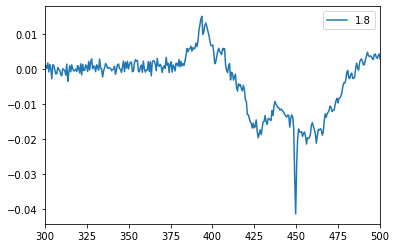

In [21]:
import pandas as pd
import numpy as np
from scipy import io
from matplotlib import pyplot as plt

# some notes to keep in mind:

# 1. The delay times are written in '18_Rubpy_004_h1.txt'
# 2. The actually data is written in '18_Rubpy_004.txt' with 
#    the wavelength being in column 1 and the absorption 
#    at various delay times being in subsequent columns

# 3. Metal-Ligand charge-transfer transitions occur at about 450 nm, and are expected to
#    show "ground-state bleach" signal (negative)

# 4. Bipyradine transitions occur ~375 nm and is expected to show 
#   "excited-state absorption" signal (positive)

# Ques


h1 = np.loadtxt('18_Rubpy_004_h1.txt')
h2 = np.loadtxt('18_Rubpy_004_h2.txt')
a = np.loadtxt('18_Rubpy_004.txt') 
print(h1)


plt.plot(a[:,0], a[:,8], label=str(h1[7]))
plt.xlim(300,500)
plt.legend()